# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


In [295]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [296]:
data = pd.read_csv('train-Housing.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [297]:
df = pd.read_csv('test-Housing-project.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

 It shows many columns have null values and data contain both Categorical and Continous data and the count for the dtypes are:-
 
 1.No.of  float = 3
 
 2.No. of int64 = 35
 
 3.No. of object= 43

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

 It shows Testing data alos have many null values and count for dtypes
 
 1.No.of  float = 4
 
 2.No. of int64 = 34
 
 3.No. of object= 42

In [13]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# drop some unwanted columns that have max nulls and which are not related to label

In [298]:
data = data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [299]:
df = df.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,NaN,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,NaN,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,18,0,0,0,0,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,99,0,0,0,0,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2008,WD,Normal
289,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,24,36,0,0,0,0,10,2006,WD,Normal


# Lets fill their nans with their mean or with most occuring elements

In [300]:
 data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

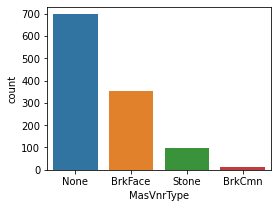

In [24]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='MasVnrType',data = data)
data['MasVnrType'].value_counts()

In [301]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [302]:
 data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

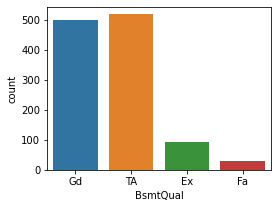

In [31]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='BsmtQual',data = data)
data['BsmtQual'].value_counts()

In [303]:
data['BsmtQual'] = data['BsmtQual'].fillna('TA')

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

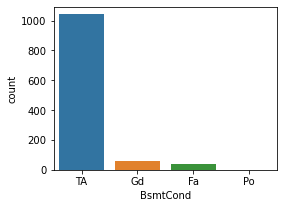

In [33]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='BsmtCond',data = data)
data['BsmtCond'].value_counts()

In [304]:
data['BsmtCond'] = data['BsmtCond'].fillna('TA')

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

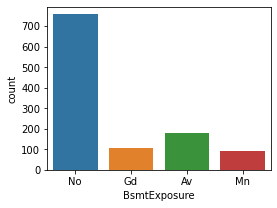

In [35]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='BsmtExposure',data = data)
data['BsmtExposure'].value_counts()

In [305]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

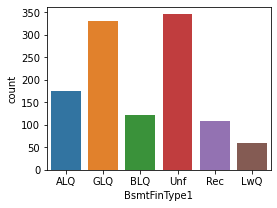

In [39]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='BsmtFinType1',data = data)
data['BsmtFinType1'].value_counts()

In [306]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')

Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

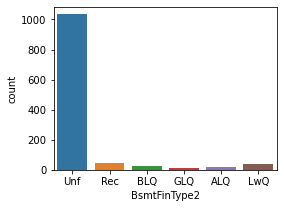

In [48]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='BsmtFinType2',data = data)
data['BsmtFinType2'].value_counts()

In [307]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

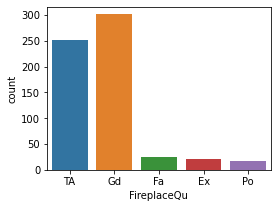

In [43]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='FireplaceQu',data = data)
data['FireplaceQu'].value_counts()

In [308]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('Gd')

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

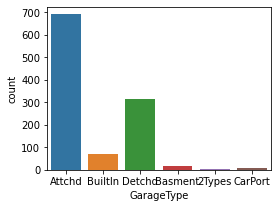

In [46]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='GarageType',data = data)
data['GarageType'].value_counts()

In [309]:
data['GarageType'] = data['GarageType'].fillna('Attchd')

In [310]:
 data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

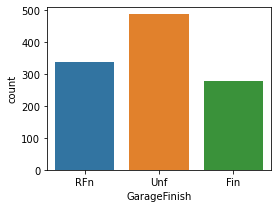

In [50]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='GarageFinish',data = data)
data['GarageFinish'].value_counts()

In [311]:
data['GarageFinish'] = data['GarageFinish'].fillna('Attchd')

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

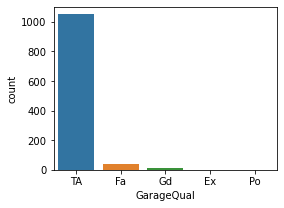

In [52]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='GarageQual',data = data)
data['GarageQual'].value_counts()

In [312]:
data['GarageQual'] = data['GarageQual'].fillna('TA')

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

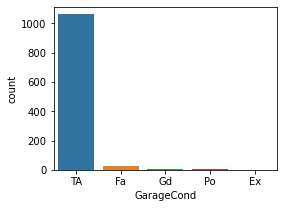

In [54]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='GarageCond',data = data)
data['GarageCond'].value_counts()

In [313]:
data['GarageCond'] = data['GarageCond'].fillna('TA')

In [314]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

# Hence, all Nans are filled 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

# Now fillings all Nans in the test data

In [315]:
 df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [316]:
 df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [317]:
 df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [318]:
df['BsmtQual'] = df['BsmtQual'].fillna('TA')

In [319]:
df['BsmtCond'] = df['BsmtCond'].fillna('TA')

In [320]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [321]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')

In [322]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

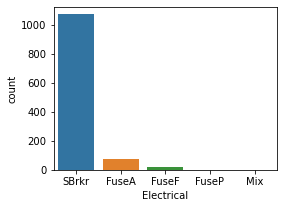

In [239]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='Electrical',data = data)
data['Electrical'].value_counts()

In [323]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

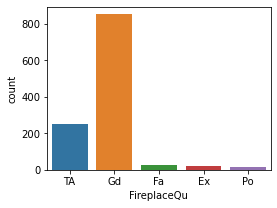

In [69]:
plt.figure(figsize=(4,3))
ax= sns.countplot(x='FireplaceQu',data = data)
data['FireplaceQu'].value_counts()

In [324]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

In [325]:
df['GarageType'] = df['GarageType'].fillna('Attchd')

In [326]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [327]:
df['GarageFinish'] = df['GarageFinish'].fillna('Attchd')

In [328]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

In [329]:
df['GarageCond'] = df['GarageCond'].fillna('TA')

In [330]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [79]:
# First we check the correlation between any columns if any then we ll remove it or relation with the Price label

In [82]:
# now we make a diff dataframe for the continous columns

In [331]:
data_con = data[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                  'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']].copy()

In [87]:
# lets encode the object datatype and check the relation with the Price and then drop columns which are not more related to Price

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [333]:
from sklearn.preprocessing import LabelEncoder

In [334]:
le = LabelEncoder()
var_mode = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
           'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
           'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [252]:
data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,NaN,0.076880,-0.014930,...,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,NaN,-0.027246,-0.023952,...,0.111221,0.004409,0.030793,-0.001663,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,NaN,-0.192468,0.046051,...,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,NaN,-0.152063,0.395410,...,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,-0.012941,0.105226,NaN,0.000153,-0.141572,...,0.021360,0.007338,0.016026,0.004505,-0.030354,-0.008860,-0.019635,0.025920,0.014176,0.044753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.016015,-0.051646,0.022517,0.015141,-0.008860,-0.050418,-0.023872,NaN,0.019084,0.030526,...,-0.036523,0.020406,0.033064,-0.038624,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,0.021421,0.009499,NaN,-0.009817,-0.005352,...,-0.005767,0.014440,0.017312,-0.066063,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.035050,0.079854,-0.035356,0.005421,0.025920,-0.015161,-0.041763,NaN,-0.002039,0.056004,...,-0.008234,-0.013696,0.010760,0.014047,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.028981,0.004501,0.065091,0.034236,0.014176,-0.054905,0.047715,NaN,0.043692,-0.061461,...,-0.091563,0.001236,0.002670,-0.074354,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


<AxesSubplot:>

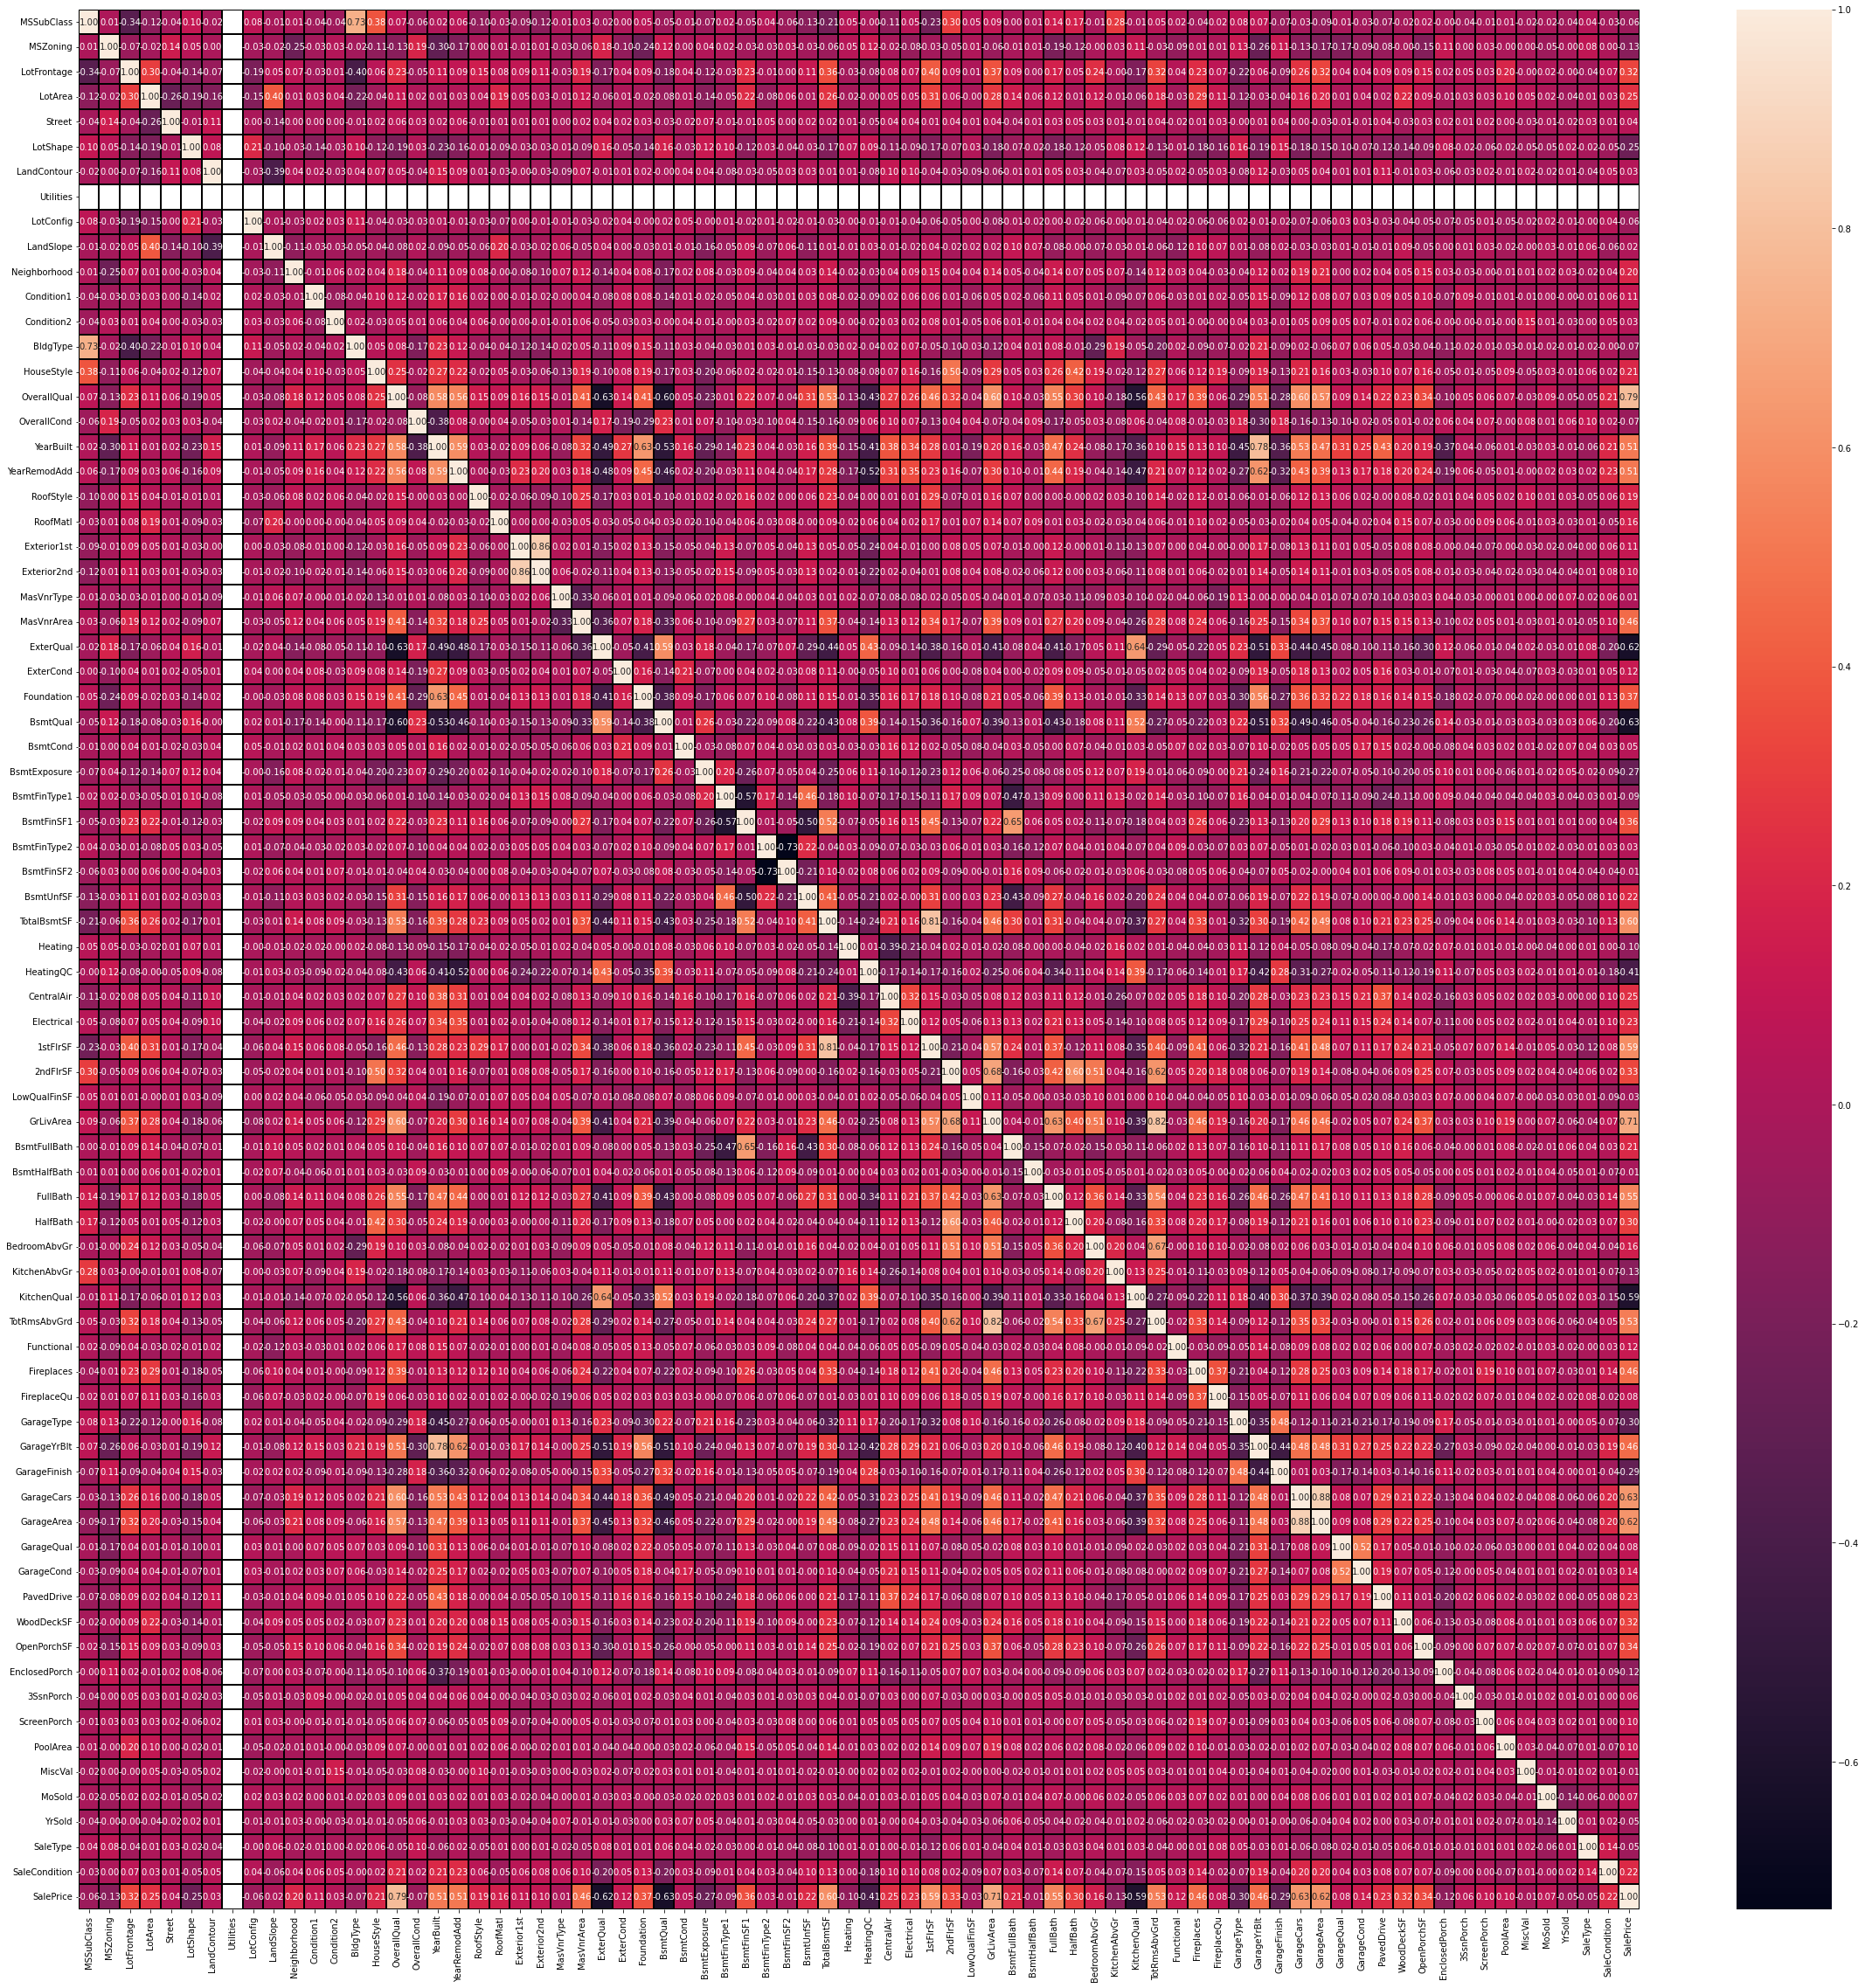

In [94]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot = True,linewidth=0.2,linecolor = 'black',fmt='0.2f')

* There are some obserbvation which are very(0-2%)less related to the Sale price columns(Label):-

 [Miscval,3SsnPorch,GArageQual,FirePlaceQu,BsmtHalfBath,LowQualFinSf,BsmtFinSf2,BsmtFinType2,MasVnrType,
  BldgType,Condition2,Landslope,Lotconfig,LandContour,STreet,MSsUbClass,]
 

* MsSubClass and BldgType are highly correlated, 

* GarageYrblt and Yrbuilt ar ehighly correlated

* Foundation and Yrbuilt are highly correlated

* Exterior1 and Exterior2 are highly correlated

* 1flrSF and TotalBsmtSf are highly correlated

* TotRmsAvGRD and GrlivArea are highly correlated

* GarageCars and GarageArea are highly correlated


1) OverAllQual and GrLivArea are the most highly postively correlated with the Label(price)

2) ExterQual, BsmtQual and KitchnQual are the most highly negatively correlated with the Label(price)






In [335]:
data = data.drop(['BldgType','YearBuilt','Exterior2nd','TotalBsmtSF','GarageCars','TotRmsAbvGrd','MiscVal','3SsnPorch',
                  'BsmtHalfBath','LowQualFinSF','BsmtFinSF2','BsmtFinType2','MasVnrType','LandSlope','LandContour'],axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,LotConfig,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,0,4,13,2,...,0,205,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,0,4,12,2,...,81,207,0,224,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,0,1,15,2,...,180,130,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,0,4,14,2,...,0,122,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,0,2,14,2,...,240,0,0,0,0,6,2009,8,4,215000


In [336]:
data_con = data[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea',
                'BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea',
                 'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                  'Fireplaces','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                 'ScreenPorch','PoolArea','MoSold','YrSold']].copy()

In [337]:
le = LabelEncoder()
vari_mode = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
           'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
           'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

for i in vari_mode:
    df[i] = le.fit_transform(df[i])

In [338]:
df = df.drop(['BldgType','YearBuilt','Exterior2nd','TotalBsmtSF','GarageCars','TotRmsAbvGrd','MiscVal','3SsnPorch',
                  'BsmtHalfBath','LowQualFinSF','BsmtFinSF2','BsmtFinType2','MasVnrType','LandSlope','LandContour'],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,LotConfig,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,0,0,21,2,...,2,178,51,0,0,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,0,1,21,2,...,2,63,0,0,0,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,0,4,4,2,...,2,202,151,0,0,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,4,5,2,...,2,0,0,0,0,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,0,1,20,1,...,2,100,18,0,0,0,1,2008,5,2


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

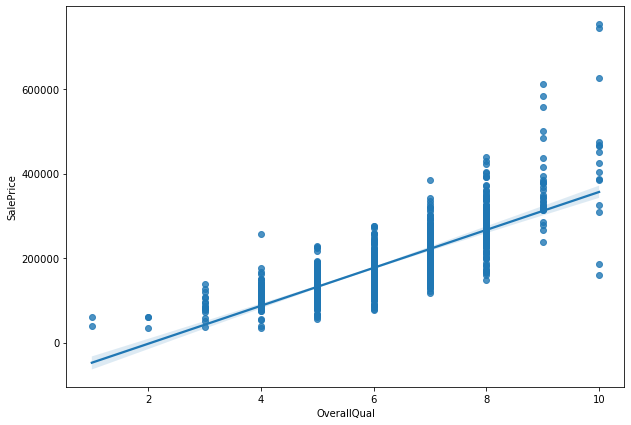

In [102]:
plt.figure(figsize=(10,7))
sns.regplot(x='OverallQual',y='SalePrice',data=data)

as OverallQuality is the most highly positively correlated with the sale price and the graph also clarifies that if the Overall
Quality is  increases than the SalePrice of a proprty is also increased


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

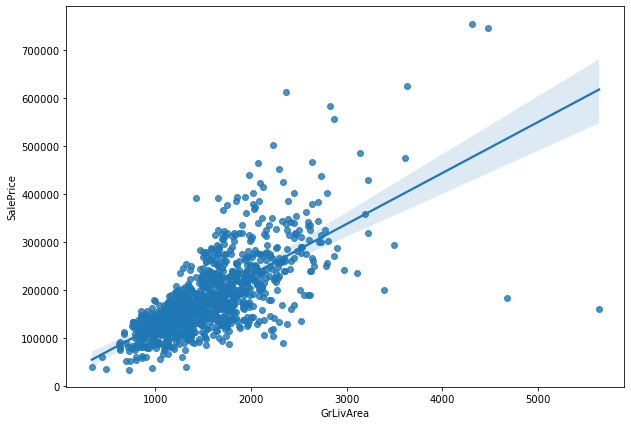

In [103]:
plt.figure(figsize=(10,7))
sns.regplot(x='GrLivArea',y='SalePrice',data=data)

Graph shows very clearly that if ABove grade area is increase then THE salePrice also increases of the property

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

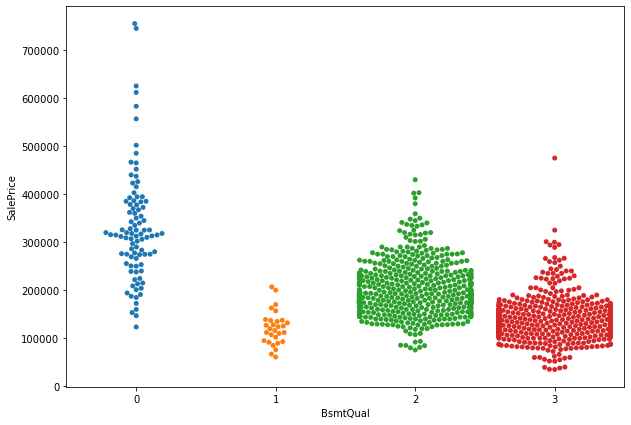

In [105]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='BsmtQual',y='SalePrice',data=data)

The Graph clearly shows that if the Quality of the Basement increases then the Saleprices WIll be decreased

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

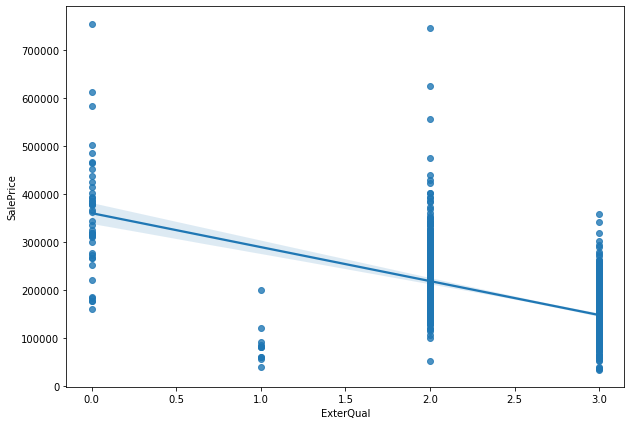

In [104]:
plt.figure(figsize=(10,7))
sns.regplot(x='ExterQual',y='SalePrice',data=data)

As it is hIghly negatively related wth the Price and Graph also shows that IF the material quality of the Exterior is increased 
then the SalePrice of the Property will decreases 

# Lets check the skewness of the continous data

In [339]:
data_con.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,120,70.98847,4928,6,5,1976,0.0,120,958,958,...,1,1977.0,440,0,205,0,0,0,2,2007
1,20,95.00000,15865,8,6,1970,0.0,351,1043,2217,...,1,1970.0,621,81,207,0,224,0,10,2007
2,60,92.00000,9920,7,5,1997,0.0,862,255,1127,...,1,1997.0,455,180,130,0,0,0,6,2007
3,20,105.00000,11751,6,6,1977,480.0,705,1139,1844,...,1,1977.0,546,0,122,0,0,0,1,2010
4,20,70.98847,16635,6,7,2000,126.0,1246,356,1602,...,1,1977.0,529,240,0,0,0,0,6,2009


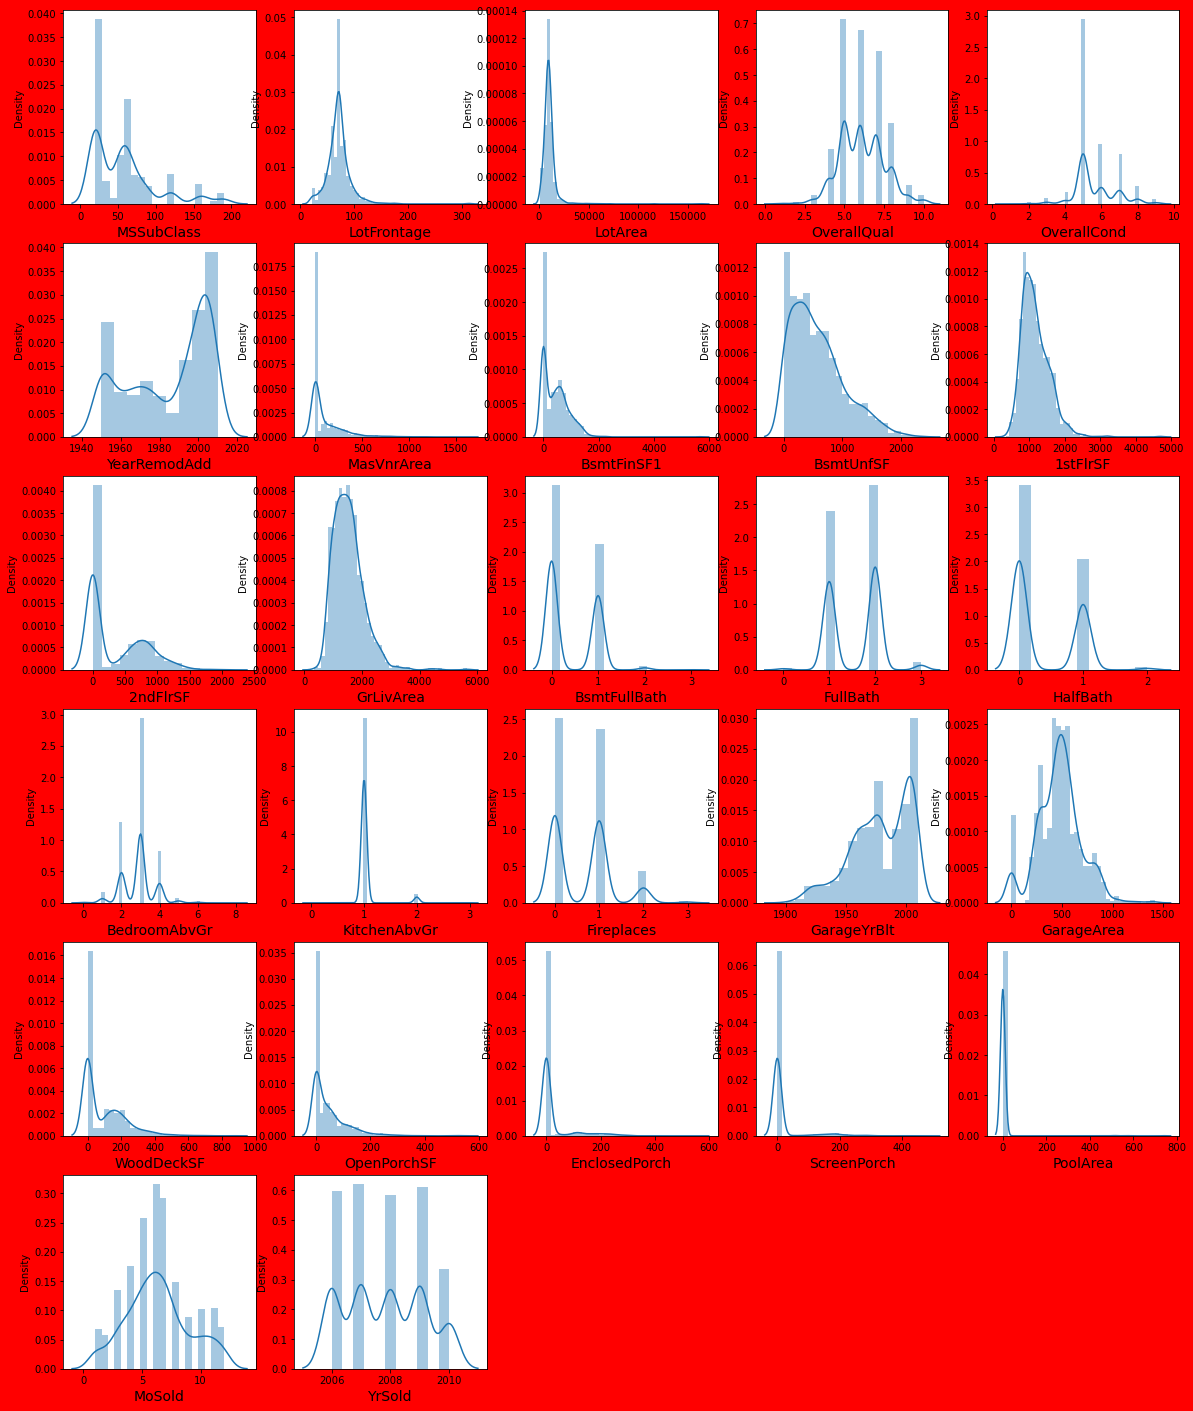

In [115]:
plt.figure(figsize = (20,25),facecolor = "red")
plotnumber = 1
for column in data_con:
    if plotnumber<=27:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data_con[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

As we can see there are too much skewness present in some columns ,lets remove it by log transform method

In [340]:
data_con.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtUnfSF         0.909057
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
BsmtFullBath      0.627106
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
ScreenPorch       4.105741
PoolArea         13.243711
MoSold            0.220979
YrSold            0.115765
dtype: float64

In [341]:
data_con['MSSubClass']  = np.cbrt(data_con['MSSubClass'])

In [342]:
data_con['LotFrontage'] = np.cbrt(data_con['LotFrontage'])

In [343]:
data_con['LotArea']  = np.log(data_con['LotArea'])

In [344]:
data_con['MasVnrArea'] = np.cbrt(data_con['MasVnrArea'])

In [345]:
data_con['BsmtFinSF1'] = np.cbrt(data_con['BsmtFinSF1'])

In [346]:
data_con['1stFlrSF'] = np.cbrt(data_con['1stFlrSF'])

In [347]:
data_con['GrLivArea'] = np.cbrt(data_con['GrLivArea'])

In [348]:
data_con['KitchenAbvGr'] = np.cbrt(data_con['KitchenAbvGr'])

In [349]:
data_con['WoodDeckSF'] = np.cbrt(data_con['WoodDeckSF'])

In [350]:
data_con['OpenPorchSF'] = np.cbrt(data_con['OpenPorchSF'])

In [351]:
data_con['EnclosedPorch'] = np.cbrt(data_con['EnclosedPorch'])

In [352]:
data_con['ScreenPorch'] = np.cbrt(data_con['ScreenPorch'])

In [353]:
data_con['PoolArea'] = np.sqrt(data_con['PoolArea'])

In [354]:
data_con.skew()

MSSubClass        0.557545
LotFrontage       0.021331
LotArea          -0.169680
OverallQual       0.175082
OverallCond       0.580714
YearRemodAdd     -0.495864
MasVnrArea        0.708717
BsmtFinSF1       -0.342801
BsmtUnfSF         0.909057
1stFlrSF          0.477956
2ndFlrSF          0.823479
GrLivArea         0.406535
BsmtFullBath      0.627106
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr     -0.540012
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageArea        0.189665
WoodDeckSF        0.248720
OpenPorchSF       0.191733
EnclosedPorch     2.159752
ScreenPorch       3.174939
PoolArea         12.917868
MoSold            0.220979
YrSold            0.115765
dtype: float64

NOW, we had fixed the Skewness from the continous data

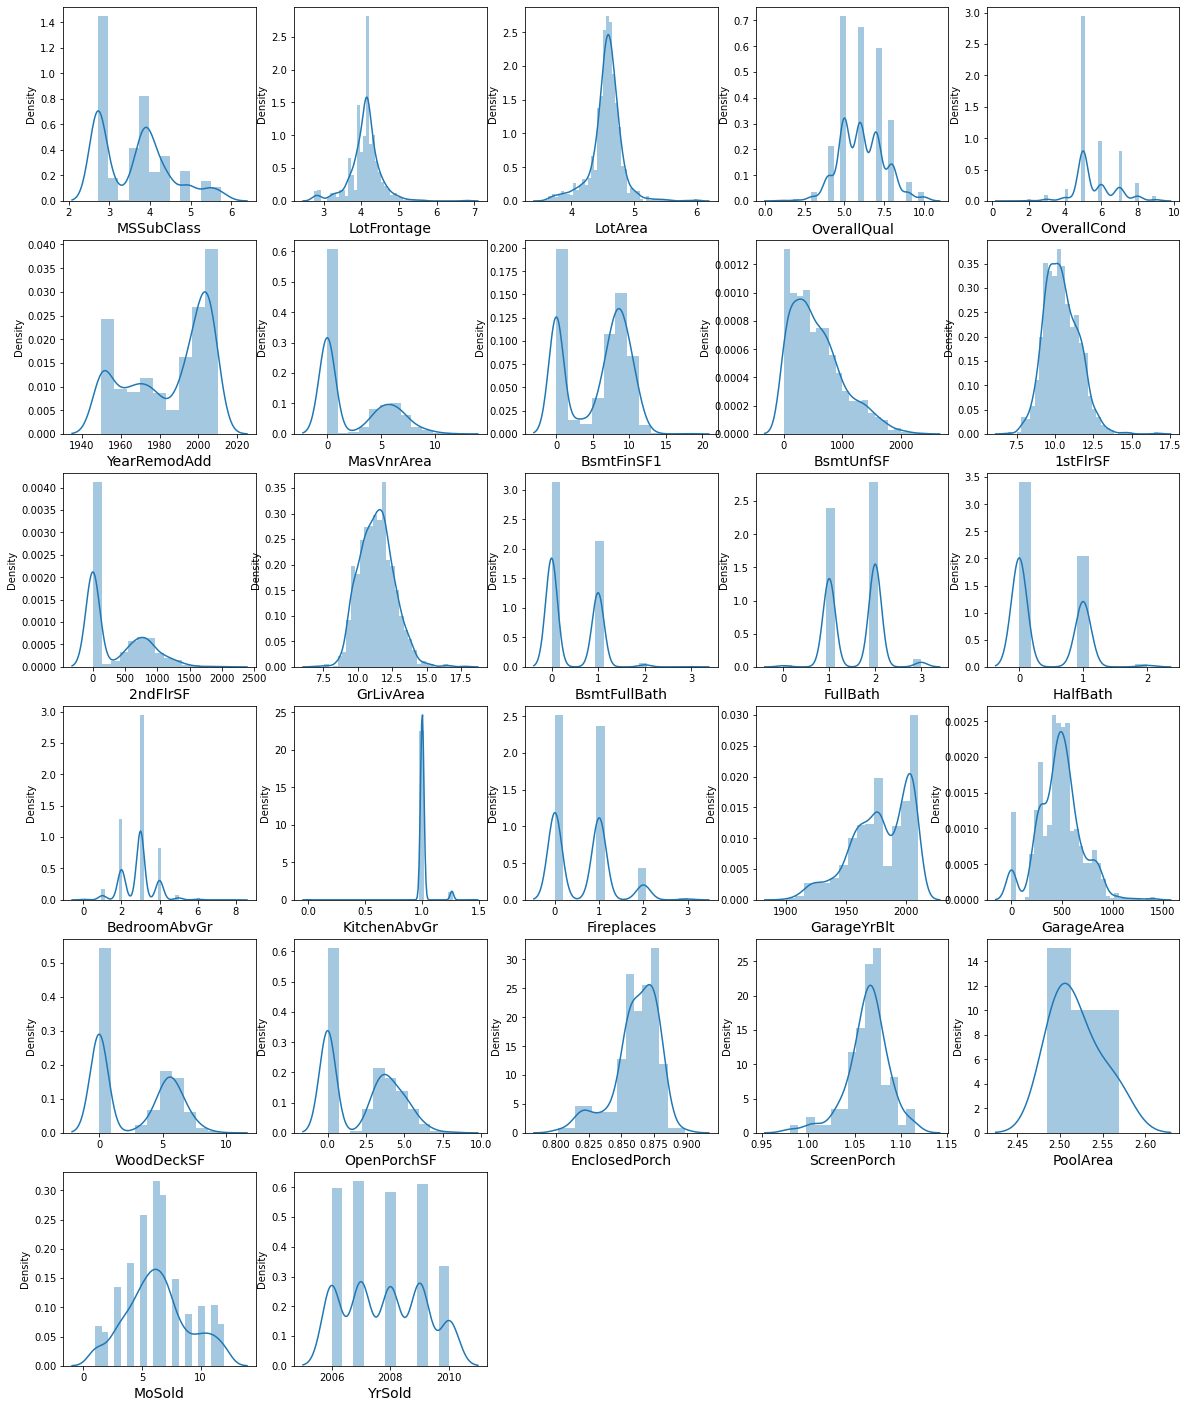

In [157]:
plt.figure(figsize = (20,25),facecolor = "white")
plotnumber = 1
for column in data_con:
    if plotnumber<=27:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data_con[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

We fixed the skewness as we can see in this graph , now we are going to checkm for the outliers

In [355]:
data_obje = data[['MSZoning','Street','LotShape','Utilities','LotConfig','Neighborhood','Condition1',
           'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','SalePrice']].copy()

In [356]:
data_obje.head()

,MSZoning,Street,LotShape,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,RoofStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,0,0,4,13,2,2,2,1,...,6,4,1,2,4,4,2,8,4,128000
1,3,1,0,0,4,12,2,2,2,0,...,6,4,1,3,4,4,2,8,4,268000
2,3,1,0,0,1,15,2,2,5,1,...,6,4,1,3,4,4,2,8,4,269790
3,3,1,0,0,4,14,2,2,2,3,...,6,4,1,2,4,4,2,0,4,190000
4,3,1,0,0,2,14,2,2,2,1,...,6,4,1,1,4,4,2,8,4,215000


In [357]:
datas = pd.concat([data_con, data_obje],axis=1)
datas.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,4.932424,4.140594,8.502689,6,5,1976,0.000000,4.932424,958,9.857993,...,6,4,1,2,4,4,2,8,4,128000
1,2.714418,4.562903,9.671871,8,6,1970,0.000000,7.054004,1043,13.039329,...,6,4,1,3,4,4,2,8,4,268000
2,3.914868,4.514357,9.202308,7,5,1997,0.000000,9.517052,255,10.406579,...,6,4,1,3,4,4,2,8,4,269790
3,2.714418,4.717694,9.371694,6,6,1977,7.829735,8.900130,1139,12.262725,...,6,4,1,2,4,4,2,0,4,190000
4,2.714418,4.140594,9.719264,6,7,2000,5.013298,10.760671,356,11.700942,...,6,4,1,1,4,4,2,8,4,215000


In [172]:
# lets correct skewness for the testing data

In [358]:
df.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
LotShape         -0.639195
Utilities        17.088007
LotConfig        -1.204667
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
MasVnrArea        1.976804
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1     -0.029787
BsmtFinSF1        0.739790
BsmtUnfSF         0.960708
Heating           8.212666
HeatingQC         0.408904
CentralAir       -3.792878
Electrical       -2.990818
1stFlrSF          0.692047
2ndFlrSF          0.765511
GrLivArea         1.010586
BsmtFullBath      0.463685
FullBath         -0.049800
H

In [359]:
df['LotArea']  = np.log(df['LotArea'])

In [360]:
df['MSSubClass']  = np.cbrt(df['MSSubClass'])

In [361]:
df['MasVnrArea']  = np.cbrt(df['MasVnrArea'])

In [362]:
df['BsmtFinSF1'] = np.cbrt(df['BsmtFinSF1'])

In [363]:
df['1stFlrSF'] = np.cbrt(df['1stFlrSF'])

In [364]:
df['GrLivArea'] = np.cbrt(df['GrLivArea'])

In [365]:
df['KitchenAbvGr'] = np.sqrt(df['KitchenAbvGr'])

In [366]:
df['WoodDeckSF'] = np.cbrt(df['WoodDeckSF'])

In [367]:
df['OpenPorchSF'] = np.cbrt(df['OpenPorchSF'])

In [368]:
df['EnclosedPorch'] = np.sqrt(df['EnclosedPorch'])

In [369]:
df['ScreenPorch'] = np.sqrt(df['ScreenPorch'])

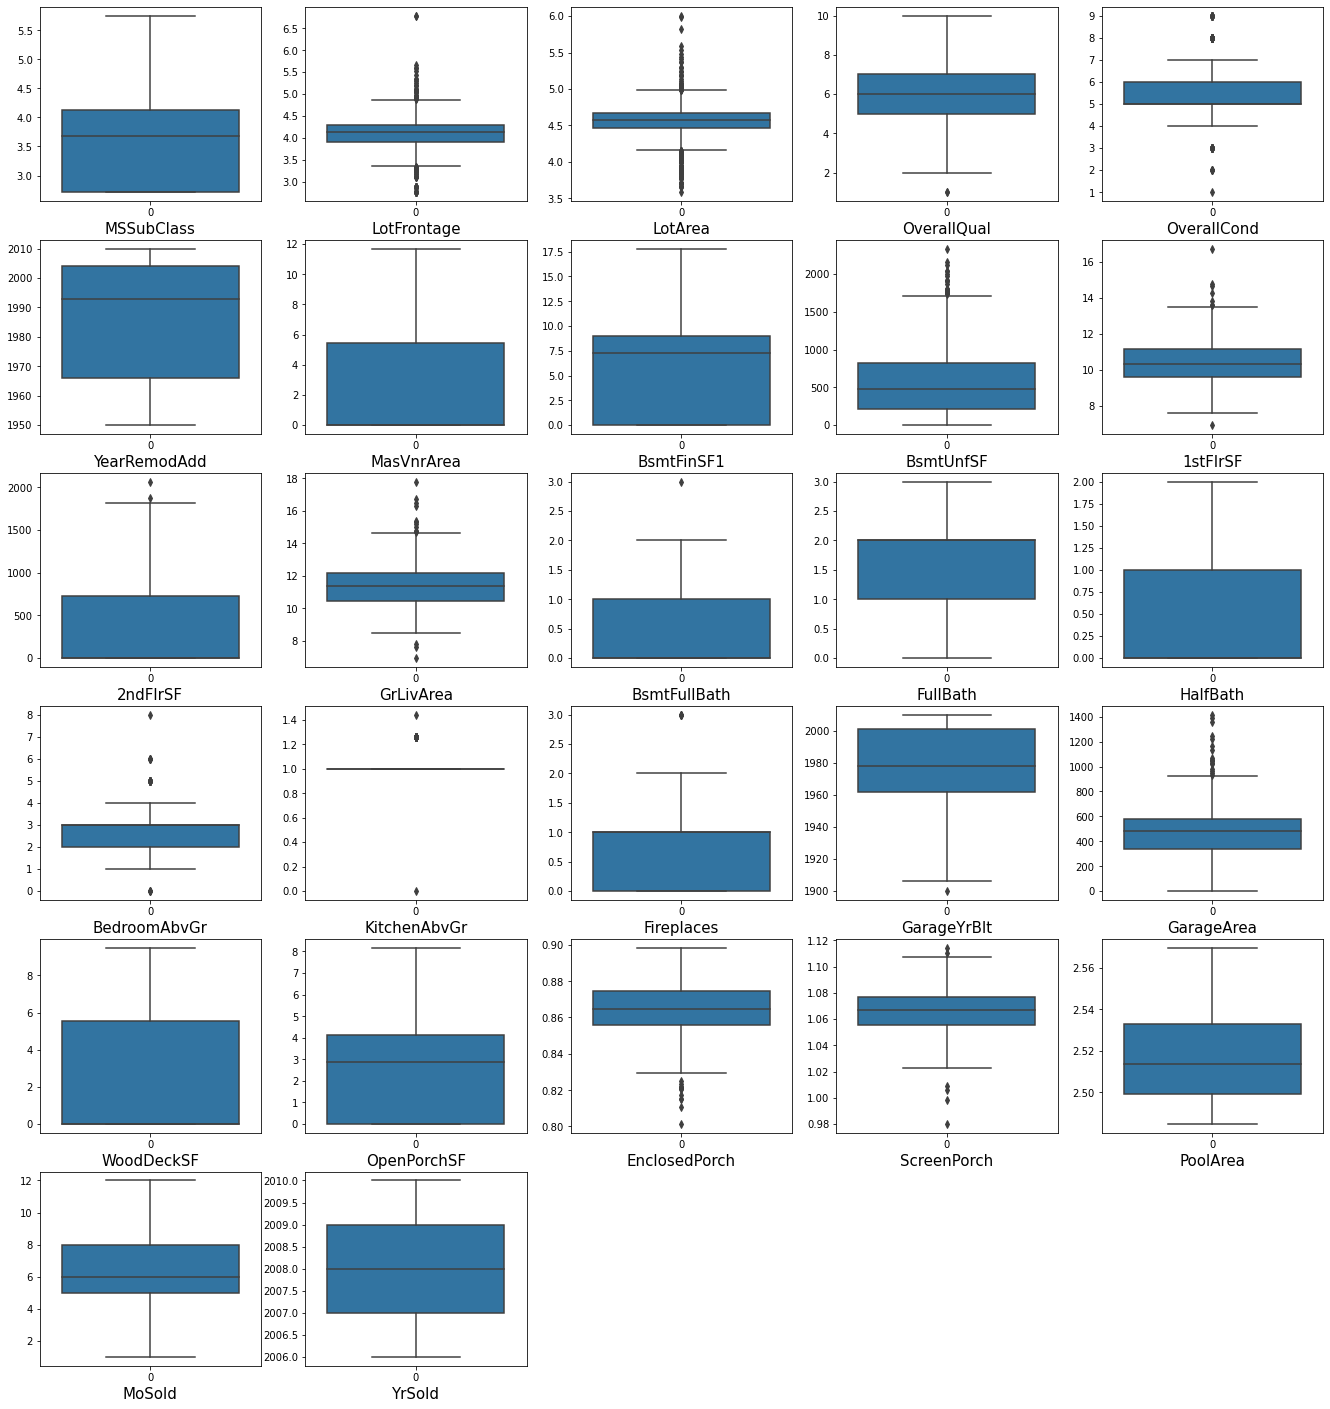

In [186]:
plt.figure(figsize = (23,25))
plotnumber = 1
for column in data_con:
    if plotnumber<=27:
        plt.subplot(6,5,plotnumber)
        ax=sns.boxplot(data=data_con[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

We'll remove these outliers from the columns which having these outliers but before we merge this contionous and object type datset

In [370]:
datas.shape

(1168, 61)

WE cant remove outliers from this data because some property can be big so that area and many things can't be an outliers so that  we are not removing outliers

as we remove some columns before who shows some multicollinearity so that we are not checking the collinearity too

In [372]:
# seprating the columns into features and target
x= datas.drop("SalePrice",axis=1)
y= datas["SalePrice"]

# So Now we are ready to build our model to predict the SALEPRICE 

# 1)WITH LOGISTIC REGRESSION

In [373]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [383]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.8586051240920989}
At random state 0 the testing accuracy is {0.7535994457037908}


At random state 1 the training accuracy is {0.8372655496908975}
At random state 1 the testing accuracy is {0.8288731774059739}


At random state 2 the training accuracy is {0.8439132495047106}
At random state 2 the testing accuracy is {0.7905799150333588}


At random state 3 the training accuracy is {0.8248067672167594}
At random state 3 the testing accuracy is {0.8816391373611445}


At random state 4 the training accuracy is {0.8579085919123917}
At random state 4 the testing accuracy is {0.7377043420466102}


At random state 5 the training accuracy is {0.8849799037311702}
At random state 5 the testing accuracy is {0.6427017729625295}


At random state 6 the training accuracy is {0.8318341181987532}
At random state 6 the testing accuracy is {0.8501722626396808}


At random state 7 the training accuracy is {0.8389704698196361}
At random state 7 the testing acc

In [384]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25,random_state=8)

In [385]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",r2_score(y_test,pred_lr)*100)


Accuracy 87.07268098528372


In [379]:
from sklearn.model_selection import cross_val_score

In [391]:
scr_lr = cross_val_score(lr,x,y,cv=6)
print("Cross Validation Score of Linear regression model is :- ",scr_lr.mean())

Cross Validation Score of Linear regression model is :-  0.7928738608028517


In [392]:
from sklearn import metrics

In [401]:
MAE = metrics.mean_absolute_error(y_test,pred_lr)
MSE = metrics.mean_squared_error(y_test,pred_lr)

In [402]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 19414.623081059515
mean squared error: 783827529.973259


In [403]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 27996.920008694866


# 2) WITH LASSO

In [412]:
from sklearn.linear_model import Lasso

In [413]:
from sklearn.model_selection import GridSearchCV

In [418]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 2}


In [423]:
ls = Lasso(alpha=1,random_state=8)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)


In [424]:
lss = r2_score(y_test,pred_ls)
lss

0.8707560298546796

In [427]:
scr_ls = cross_val_score(ls,x,y,cv=6)
print("Cross Validation Score of Linear regression model is :- ",scr_ls.mean())

Cross Validation Score of Linear regression model is :-  0.7929915503537304


In [428]:
MAE = metrics.mean_absolute_error(y_test4,pred_ls)
MSE = metrics.mean_squared_error(y_test,pred_ls)

In [429]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 19413.99557746048
mean squared error: 783650359.1163794


In [430]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 27993.755716523272


# 3) WITH RANDOMFOREST REGRESSOR

In [432]:
from sklearn.ensemble import RandomForestRegressor

In [435]:
rf = RandomForestRegressor(criterion="mae",max_features="auto",max_depth=4,min_samples_leaf=4)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

In [442]:
rfs = r2_score(y_test,pred_dec)
print('R2 Score:',rfs*100)
rf_score = cross_val_score(rf,x,y,cv=5)
rfc = rf_score.mean()
print("Cross val Score :",rfc*100)

R2 Score: 83.70578086214124
Cross val Score : 78.17425756831013


In [439]:
MAE = metrics.mean_absolute_error(y_test,pred_dec)
MSE = metrics.mean_squared_error(y_test,pred_dec)

In [440]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 21414.096113013697
mean squared error: 987974190.5596619


In [441]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 31432.05673448147


# 4) WITH  ADABOOST REGRESSOR

In [443]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [444]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [445]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [446]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [447]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)

In [448]:
ada = AdaBoostRegressor(learning_rate=0.4,n_estimators=60)

In [449]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)

In [450]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.8428228660358811


In [460]:
cv_score = cross_val_score(ada,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8048521836409679

In [452]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)

In [454]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 21871.659999832784
mean squared error: 953018677.2920394


In [455]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 30871.00058780148


# 5) WITH GRADIENT BOOSTING REGRESSOR

In [485]:
from sklearn.ensemble import GradientBoostingRegressor

In [486]:
gbd = GradientBoostingRegressor()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",r2_score(y_test,pred_gbd)*100)

Accuracy 89.20525241641771


In [487]:
cv_score = cross_val_score(gbd,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8661109211743117

In [469]:
MAE = metrics.mean_absolute_error(y_test,pred_gbd)
MSE = metrics.mean_squared_error(y_test,pred_gbd)

In [470]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 16379.445074982948
mean squared error: 651198565.0654161


In [471]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 25518.59253692131


# so the difference between the cross val score and the accuracy score is  min for the GBDT algo AND IT ALSO GIVE BETTER ACCURACY WE USED THIS algo

In [474]:
# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV on gbd

In [482]:
grid_params = {'max_depth':range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

clf = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)
clf.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [476]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4}


In [483]:
gbd = GradientBoostingRegressor(max_depth = 5, min_samples_split = 5, learning_rate = 0.1)

In [488]:
gbd.fit(x_train,y_train)

GradientBoostingRegressor()

In [489]:
y_preds = gbd.predict(x_test)

In [490]:
print("ACCURACY",r2_score(y_test,y_preds))

ACCURACY 0.8917837019302295


In [491]:
# Hence its acuraccy not increased even after applying hyper tuning but This gbd algo gives best accuracy 

In [495]:
# saving the model for later prediction
import pickle

In [496]:
filename = 'SalePrice.pickle'
pickle.dump(gbd,open(filename,'wb'))

# HENCE MY MODEL IS READY TO PREDICT

In [497]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,LotConfig,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,2.714418,2,86.000000,9.557964,1,0,0,0,21,2,...,2,5.625226,3.708430,0.0,0.0,0,7,2007,5,2
1,4.932424,2,66.425101,8.668024,1,0,0,1,21,2,...,2,3.979057,0.000000,0.0,0.0,0,8,2009,0,0
2,2.714418,2,66.425101,9.379070,1,3,0,4,4,2,...,2,5.867464,5.325074,0.0,0.0,0,6,2009,5,2
3,4.121285,2,75.000000,9.392662,1,3,0,4,5,2,...,2,0.000000,0.000000,0.0,0.0,0,7,2009,5,2
4,3.914868,2,86.000000,9.588640,1,0,0,1,20,1,...,2,4.641589,2.620741,0.0,0.0,0,1,2008,5,2


In [498]:
# prediction using from the saved model 

In [499]:
load_model = pickle.load(open(filename,'rb'))

In [507]:
a1 = load_model.predict(x_test)
a1

array([171136.3210267 , 107420.2876594 , 141247.05003353, 521394.13577593,
       145411.00515033, 163181.48246335, 211468.661324  , 142768.28212858,
       304240.31402253, 166301.39618916, 124083.616099  , 228431.68344438,
        85481.06535382, 339873.66401384, 110911.69305349, 149494.19006063,
       188575.02188158, 208437.20390745, 218241.6673392 , 151114.85320796,
       159990.94700895, 138358.09112038, 127385.08790058, 257910.79522625,
       333519.75620463, 129396.882747  , 192554.97238898, 333857.39378597,
       216133.4524128 , 209828.54318195, 131494.49012647, 193952.86100869,
       187609.6690511 , 197704.63793685, 180413.55439775, 182942.68144228,
       131291.00862379, 193639.63897577, 252400.93958991, 361643.84561063,
       165023.95214124, 154649.88031904, 268933.77508897, 111230.2502438 ,
       196182.54696867, 218217.5314775 , 151871.14386345, 127136.44878377,
       148380.14425423, 134391.71164518,  65893.97269657, 142778.73544709,
       108717.96439951, 1

In [508]:
len(a1)

292

In [ ]:
# hence My predict on the Test data(df) done 